In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn import tree

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,\
    classification_report, confusion_matrix

import sys
sys.path.insert(0, '../titanic/')
import load_titanic_data



In [2]:
#loading data
# load data
exclude = {"PassengerId", "Name", "Fare", "Ticket", "Cabin"}
train_data = load_titanic_data.train_data(drop_columns = exclude)
test_data = load_titanic_data.test_data(drop_columns = exclude)



Training Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Embarked    891 non-null int64
dtypes: int64(7)
memory usage: 48.9 KB
None

Testing Set Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass      418 non-null int64
Sex         418 non-null int64
Age         418 non-null int64
SibSp       418 non-null int64
Parch       418 non-null int64
Embarked    418 non-null int64
dtypes: int64(6)
memory usage: 19.7 KB
None


In [3]:
scaled_features = scale(train_data["features"])

In [4]:
dt_model = tree.DecisionTreeClassifier(min_samples_split = 40)

In [5]:
# split data into training and validation set
X_train, X_test, y_train, y_test = train_test_split(
    scaled_features, train_data['labels'], random_state = 42, test_size = 0.2
)

In [6]:
dt_model = dt_model.fit(X_train, y_train)

In [7]:
predictions = dt_model.predict(X_test)

In [8]:
print("Here is the classification report of the Decision Tree Model:")
print(classification_report(y_test, predictions, target_names = ["Did Not Survive", "Survived"]))

Here is the classification report of the Decision Tree Model:
                 precision    recall  f1-score   support

Did Not Survive       0.80      0.89      0.84       105
       Survived       0.81      0.69      0.74        74

       accuracy                           0.80       179
      macro avg       0.81      0.79      0.79       179
   weighted avg       0.80      0.80      0.80       179



# Changing the min samples to 20

In [9]:
dt_model2 = tree.DecisionTreeClassifier(min_samples_split=20)

In [10]:
dt_model2 = dt_model2.fit(X_train, y_train)

In [11]:
pred2 = dt_model2.predict(X_test)

In [12]:
print("Here is the classification report of the Decision Tree Model:")
print(classification_report(y_test, pred2, target_names = ["Did Not Survive", "Survived"]))

Here is the classification report of the Decision Tree Model:
                 precision    recall  f1-score   support

Did Not Survive       0.81      0.87      0.84       105
       Survived       0.79      0.72      0.75        74

       accuracy                           0.80       179
      macro avg       0.80      0.79      0.80       179
   weighted avg       0.80      0.80      0.80       179



# Changing the min samples to 50

In [13]:
dt_model_50 = tree.DecisionTreeClassifier(min_samples_split=50)

In [14]:
dt_model_50 = dt_model_50.fit(X_train, y_train)

In [15]:
pred_50 = dt_model_50.predict(X_test)

In [16]:
print("Here is the classification report of the Decision Tree Model:")
print(classification_report(y_test, pred_50, target_names = ["Did Not Survive", "Survived"]))

Here is the classification report of the Decision Tree Model:
                 precision    recall  f1-score   support

Did Not Survive       0.79      0.89      0.83       105
       Survived       0.80      0.66      0.73        74

       accuracy                           0.79       179
      macro avg       0.80      0.77      0.78       179
   weighted avg       0.79      0.79      0.79       179



# Tree Plot

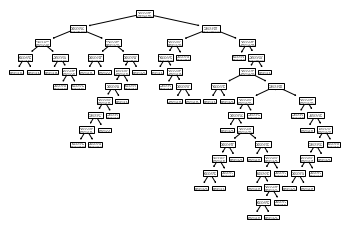

In [17]:
tree.plot_tree(dt_model_50.fit(scaled_features, train_data['labels']));

# Correlations

# Confusion Matrix Plot

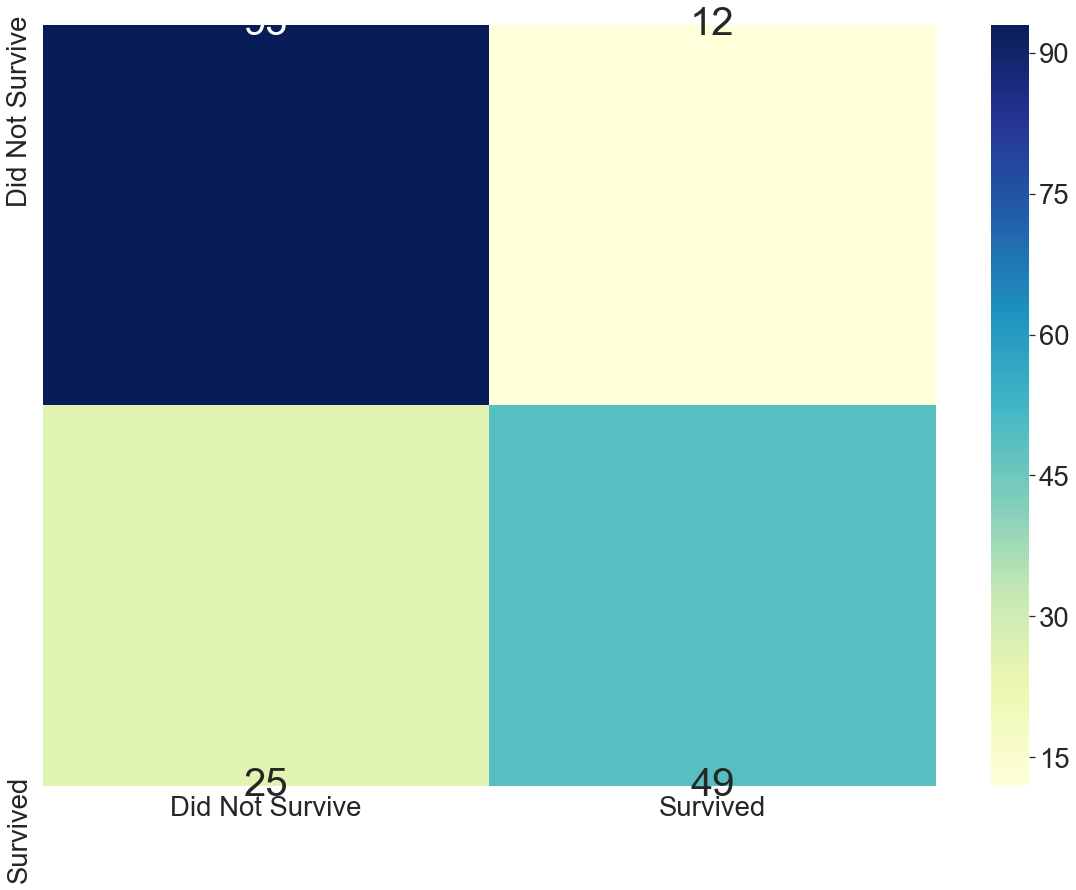

In [18]:
cm = confusion_matrix(y_test, pred_50)

cm_df = pd.DataFrame(cm, index = {i for i in y_test}, 
                             columns = {i for i in y_test})
plt.figure(figsize = (20,14))
sns.set(font_scale = 2.5)
sns.heatmap(cm_df, annot=True, annot_kws = {"size":40}, cmap="YlGnBu", xticklabels = ["Did Not Survive", "Survived"],
                    yticklabels = ["Did Not Survive", "Survived"])
        
plt.show()

In [19]:
print(cm)

[[93 12]
 [25 49]]


# Models with max depth as the hyperparameter

In [20]:
dt_model_depth_2 = tree.DecisionTreeClassifier(max_depth=2)


In [21]:
dt_model_depth_2 = dt_model_depth_2.fit(X_train, y_train)

In [22]:
pred_depth_2 = dt_model_depth_2.predict(X_test)

In [23]:
print("Here is the classification report of the Decision Tree Model - Depth 2:")
print(classification_report(y_test, pred_50, target_names = ["Did Not Survive", "Survived"]))

Here is the classification report of the Decision Tree Model - Depth 2:
                 precision    recall  f1-score   support

Did Not Survive       0.79      0.89      0.83       105
       Survived       0.80      0.66      0.73        74

       accuracy                           0.79       179
      macro avg       0.80      0.77      0.78       179
   weighted avg       0.79      0.79      0.79       179



# Max Depth 4

In [24]:
dt_model_depth_4 = tree.DecisionTreeClassifier(max_depth=4)
dt_model_depth_4 = dt_model_depth_4.fit(X_train, y_train)
pred_depth_4 = dt_model_depth_4.predict(X_test)

In [25]:
print("Here is the classification report of the Decision Tree Model - Depth 4:")
print(classification_report(y_test, pred_50, target_names = ["Did Not Survive", "Survived"]))

Here is the classification report of the Decision Tree Model - Depth 4:
                 precision    recall  f1-score   support

Did Not Survive       0.79      0.89      0.83       105
       Survived       0.80      0.66      0.73        74

       accuracy                           0.79       179
      macro avg       0.80      0.77      0.78       179
   weighted avg       0.79      0.79      0.79       179



# Predictions on Test

In [26]:
test_predictions = dt_model.predict(test_data)

In [28]:
columns = ["PassengerId","Pclass","Name","Sex","Age","SibSp","Parch","Ticket","Fare","Cabin","Embarked"]
selected_columns = set(columns).difference(exclude)
test_features_df = pd.DataFrame(data = test_data, columns = [name for name in columns if name in selected_columns] )
test_labels_df = pd.DataFrame(data = test_predictions, columns = ["Survived_DT"])
test_df = pd.concat([test_features_df, test_labels_df], axis = 1)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived_DT
0,2,1,39,0,0,1,0
1,2,0,55,1,0,2,0
2,1,1,71,0,0,1,0
3,2,1,28,0,0,2,0
4,2,0,21,1,1,2,0


In [ ]:

submission.to_csv("../submissions/DT_Submission2.csv",index=False)

In [29]:
test_features_raw_df = pd.read_csv("../titanic/test.csv", encoding = "UTF-8", delimiter = ","
                        ) 
test_df_raw = pd.concat([test_features_raw_df, test_labels_df], axis = 1)
test_df_raw.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_DT
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0


In [31]:
submission = test_df_raw[["PassengerId", "Survived_DT"]]
submission.rename(columns = {"Survived_DT": "Survived"}, inplace = True)
submission.astype("int32")
submission.to_csv("../submissions/new_DT_submission.csv", index = False)

/Users/stephaniewalsh/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
